## **Network Compression using SVD**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torchvision
from torch import nn, optim
import torch.nn.functional as F
import torch.utils.data as utils
from torch.utils.data import DataLoader, Dataset

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# defining transformations
transformations = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                torchvision.transforms.Normalize((0.1307,), (0.3081,)),])

# downloading and loading train data
mnist_train = torchvision.datasets.MNIST('mnist_train', train=True, download=True, transform=transformations)

# putting all the data on to the GPU at once for faster training
train_loader = utils.DataLoader(mnist_train, batch_size=len(mnist_train), shuffle=True)
img, tar = next(iter(train_loader))
img, tar = img.to(device), tar.to(device)
train_loader = utils.DataLoader(utils.TensorDataset(img, tar), batch_size=512, shuffle = True)
del img, tar


# downloading and loading test data
mnist_test = torchvision.datasets.MNIST('mnist_test', train=False, download=True, transform=transformations)

test_loader = utils.DataLoader(mnist_test, batch_size=len(mnist_test), shuffle=False)
img, tar = next(iter(test_loader))
img, tar = img.to(device), tar.to(device)
test_loader = utils.DataLoader(utils.TensorDataset(img, tar), batch_size=256, shuffle = False)
del img, tar

Extracting mnist_train/MNIST/raw/train-images-idx3-ubyte.gz to mnist_train/MNIST/raw


Extracting mnist_train/MNIST/raw/train-labels-idx1-ubyte.gz to mnist_train/MNIST/raw


Extracting mnist_train/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist_train/MNIST/raw


Extracting mnist_train/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist_train/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Extracting mnist_test/MNIST/raw/train-images-idx3-ubyte.gz to mnist_test/MNIST/raw


Extracting mnist_test/MNIST/raw/train-labels-idx1-ubyte.gz to mnist_test/MNIST/raw




Extracting mnist_test/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist_test/MNIST/raw


Extracting mnist_test/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist_test/MNIST/raw
Processing...
Done!




In [ ]:
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(784, 1024)
        self.fc2 = nn.Linear(1024, 1024)
        self.fc3 = nn.Linear(1024, 1024)
        self.fc4 = nn.Linear(1024, 1024)
        self.fc5 = nn.Linear(1024, 1024)
        self.out = nn.Linear(1024, 10)
    
    def forward(self, img):
        # flatten the image
        x = img.view(img.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.out(x)
        
        return x

In [ ]:
# defining model, error function, and optimizer
model = Classifier()
model.to(device)

# Since we have multiclass classification, Cross Entropy loss function is best suited for our case.
err_func = nn.CrossEntropyLoss()

# chose adam optimizer as it is consider the best
# optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
optimizer = optim.Adam(model.parameters(), lr=1e-4)

print(model)

Classifier(
  (fc1): Linear(in_features=784, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=1024, bias=True)
  (fc4): Linear(in_features=1024, out_features=1024, bias=True)
  (fc5): Linear(in_features=1024, out_features=1024, bias=True)
  (out): Linear(in_features=1024, out_features=10, bias=True)
)


In [ ]:
# Training the network
epochs = 40
 
for e in range(1, epochs+1):
    train_loss_epoch = 0
    for img, label in train_loader:
        # set the gradients to zero as PyTorch automatically accumulates gradients
        optimizer.zero_grad()
        
        # get the output from the model
        probs = model(img)
        
        # calculate loss
        loss = err_func(probs, label)
        
        # Calculate gradients
        loss.backward()
        
        # Propagate gradients back
        optimizer.step()
        
        train_loss_epoch += loss.item()
    loss = round(train_loss_epoch/len(train_loader), 6)
    print("EPOCH:{eps}  |     train_loss:{ls}".format(eps = e, ls=loss))

EPOCH:1  |     train_loss:0.7301
EPOCH:2  |     train_loss:0.22372
EPOCH:3  |     train_loss:0.152625
EPOCH:4  |     train_loss:0.111551
EPOCH:5  |     train_loss:0.087014
EPOCH:6  |     train_loss:0.070722
EPOCH:7  |     train_loss:0.055595
EPOCH:8  |     train_loss:0.042773
EPOCH:9  |     train_loss:0.032891
EPOCH:10  |     train_loss:0.028831
EPOCH:11  |     train_loss:0.021947
EPOCH:12  |     train_loss:0.016265
EPOCH:13  |     train_loss:0.014524
EPOCH:14  |     train_loss:0.009893
EPOCH:15  |     train_loss:0.00612
EPOCH:16  |     train_loss:0.006724
EPOCH:17  |     train_loss:0.009289
EPOCH:18  |     train_loss:0.008763
EPOCH:19  |     train_loss:0.005533
EPOCH:20  |     train_loss:0.002352
EPOCH:21  |     train_loss:0.001159
EPOCH:22  |     train_loss:0.000625
EPOCH:23  |     train_loss:0.000261
EPOCH:24  |     train_loss:0.000223
EPOCH:25  |     train_loss:0.000181
EPOCH:26  |     train_loss:0.000158
EPOCH:27  |     train_loss:0.000107
EPOCH:28  |     train_loss:9.4e-05
EPOCH:

In [ ]:
# testing the network
with torch.no_grad():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        
        output = model(data)
        test_loss += err_func(output, target).item()
        
        # prediction will be the class with highest probability
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).sum()

test_loss /= len(test_loader.dataset)
correct = 100 * (correct.item()/len(test_loader.dataset))
print("Test Loss:{tl}  |     Accuracy:{acc}".format(tl = round(test_loss, 4), acc=correct))
baseline_acc= correct

# Save the model
torch.save(model.state_dict(), '/content/drive/My Drive/Colab Notebooks/HW3/baseline_model.pt')

Test Loss:0.0004  |     Accuracy:98.37


In [ ]:
baseline_weights = torch.load('/content/drive/My Drive/Colab Notebooks/HW3/baseline_model.pt')
key_list = [k for k in baseline_weights.keys() if 'weight' in k][:-1]
key_list

['fc1.weight', 'fc2.weight', 'fc3.weight', 'fc4.weight', 'fc5.weight']

In [ ]:
# checking how we get model weights
print("shape of fc1 weight matrix: ", baseline_weights[key_list[0]].shape)
baseline_weights[key_list[0]]

shape of fc1 weight matrix:  torch.Size([1024, 784])


tensor([[ 0.0222, -0.0348, -0.0121,  ...,  0.0014, -0.0096,  0.0041],
        [ 0.0093, -0.0039,  0.0034,  ..., -0.0095, -0.0041, -0.0218],
        [ 0.0252,  0.0048,  0.0272,  ..., -0.0279, -0.0335, -0.0312],
        ...,
        [ 0.0277,  0.0236,  0.0255,  ..., -0.0209,  0.0020,  0.0276],
        [ 0.0069,  0.0207, -0.0253,  ...,  0.0043, -0.0150, -0.0225],
        [ 0.0252, -0.0268, -0.0343,  ..., -0.0366,  0.0054, -0.0282]],
       device='cuda:0')

In [ ]:
# Baseline parameters
base_params = 0
for i in range(len(key_list)):
    print(key_list[i])
    print(baseline_weights[key_list[i]].shape[0], baseline_weights[key_list[i]].shape[1])
    base_params += baseline_weights[key_list[i]].shape[0] * baseline_weights[key_list[i]].shape[1]
    print("\n")
print("Total baseline parameters: ", base_params)

fc1.weight
1024 784


fc2.weight
1024 1024


fc3.weight
1024 1024


fc4.weight
1024 1024


fc5.weight
1024 1024


Total baseline parameters:  4997120


In [ ]:
# function to get SVD of each weight matric and storing them in a dictionary
def getSVD(weights, lister):
    from collections import defaultdict
    dicty = defaultdict(list)
    for layer in lister:
        W = torch.transpose(weights[layer], 1, 0)
        u, s, v = torch.svd(W)
        #s = torch.diag(s)
        dicty[layer] = [u, s, v]
    return dicty

dictSVD = getSVD(baseline_weights, key_list)
dictSVD.keys()

dict_keys(['fc1.weight', 'fc2.weight', 'fc3.weight', 'fc4.weight', 'fc5.weight'])

In [ ]:
# function to get new compressed weight matrix
def getCompressed(layer_svd, D):
    u, s, v = layer_svd
    u = u[:, :D]
    s = s[:D]
    v = v[:, :D].T #torch.transpose(v[:, :D], 1, 0)
    n = torch.numel(u) + torch.numel(s) + torch.numel(v)
    s = torch.diag(s)
    return torch.matmul(u, torch.matmul(s, v)), n

In [ ]:
accuracy_list = []
n_params = []

# there are 7 values for D
portions = [10, 20, 50, 100, 200, None]

for D in portions:
    model.train()
    print("Testing Portion D = ", D if D is not None else 784)
    model.load_state_dict(torch.load('/content/drive/My Drive/Colab Notebooks/HW3/baseline_model.pt'))
    weights_ = model.state_dict()
    n = 0
    for layer in key_list:
        new_W, p = getCompressed(dictSVD[layer], D)
        weights_[layer] = torch.transpose(new_W, 1, 0)
        n += p
   
    model.load_state_dict(weights_)
    n_params.append(n)
    print("no.of parameters: ", n)
    if D == 20:
        torch.save(model.state_dict(), '/content/drive/My Drive/Colab Notebooks/HW3/D20.pt')
    
    # ---- Testing the model for each D ----
    with torch.no_grad():
        model.eval()
        test_loss = 0
        correct = 0
        for data, target in test_loader:
            output = model(data)
            test_loss += err_func(output, target).item()
            
            # prediction will be the class with highest probability
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()

    test_loss /= len(test_loader.dataset)
    correct = 100 * (correct.item()/len(test_loader.dataset))
    accuracy_list.append(correct)
    print("Test Loss:{tl}  |     Accuracy:{acc} \n".format(tl = round(test_loss, 4), acc=correct))

Testing Portion D =  10
no.of parameters:  100050
Test Loss:0.0085  |     Accuracy:70.23 

Testing Portion D =  20
no.of parameters:  200100
Test Loss:0.0045  |     Accuracy:82.42 

Testing Portion D =  50
no.of parameters:  500250
Test Loss:0.0022  |     Accuracy:90.60000000000001 

Testing Portion D =  100
no.of parameters:  1000500
Test Loss:0.0015  |     Accuracy:93.31 

Testing Portion D =  200
no.of parameters:  2001000
Test Loss:0.0007  |     Accuracy:97.05 

Testing Portion D =  784
no.of parameters:  9810960
Test Loss:0.0004  |     Accuracy:98.37 



We can see that as we increase the portion the acuuracy is also increasing. I have also printed the no.of parameters to see how many paramters are used.

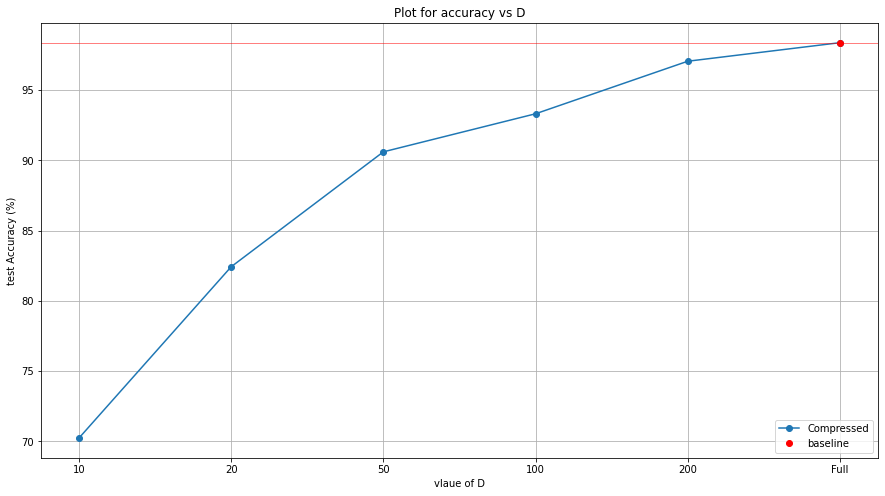

In [ ]:
# plot the accuracy vs Portion (D)
portions = ["10", "20", "50", "100", "200", "Full"]
fig = plt.figure(figsize=(15,8))
plt.plot(portions, accuracy_list, marker='o', label="Compressed")
plt.plot("Full", baseline_acc, 'ro', label="baseline")
plt.axhline(y=baseline_acc, color='r', linestyle='-', linewidth=0.5)
plt.title("Plot for accuracy vs D")
plt.xlabel("vlaue of D")
plt.ylabel("test Accuracy (%)")
plt.legend()
plt.grid()
plt.show()

A plot comparing baseline model with compressed model with different value of D.

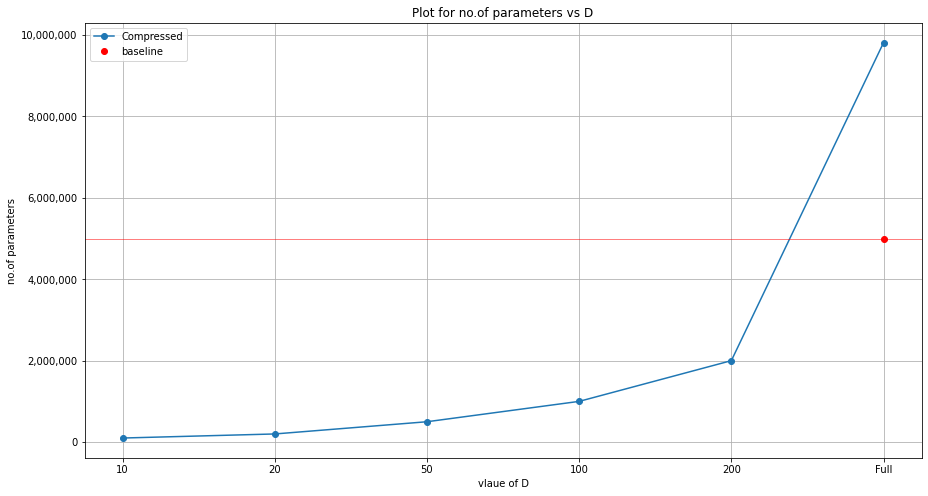

In [ ]:
# plot the no.of parameters vs Portion (D)
fig = plt.figure(figsize=(15,8))
plt.plot(portions, n_params, marker='o', label="Compressed")
plt.plot("Full", base_params, 'ro', label="baseline")
plt.axhline(y=base_params, color='r', linestyle='-', linewidth=0.5)
plt.title("Plot for no.of parameters vs D")
plt.xlabel("vlaue of D")
plt.ylabel("no.of parameters")
plt.legend()
plt.grid()
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

A plot comparing no.of parameters for baseline model and compressed model having different value of D. The reason we have no.of paramteres for baseline less than no.of parameters for D_full is because parameters are caluclated based on the the dimensions (**row \* D + D + D \* columns**) and by performing SVD on D_full we get an aditional dimension causing to increase the no.of parameters.